### Zadanie 1

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def chybeshev_nodes(n):
    return np.array(- np.cos((2 * np.linspace(1, n, n) - 1) / (2*n) * np.pi))

def legendre_nodes(n):
    return np.polynomial.legendre.legroots([0 for _ in range(n)] + [1])

def calc_distances(x_nodes: np.ndarray):
    n = len(x_nodes)

    return np.array([np.prod([abs(x - o) for o in x_nodes if o != x])**(1.0/(n-1)) for x in x_nodes])


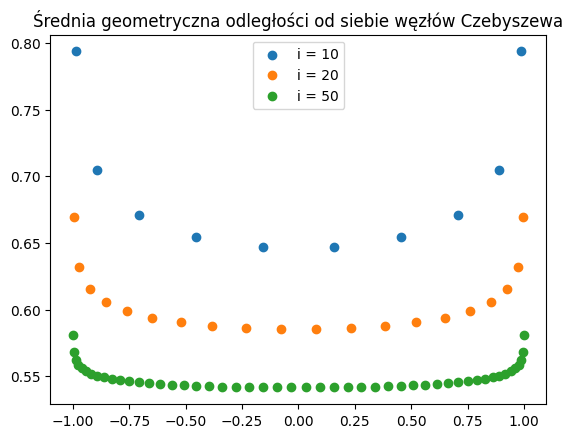

In [92]:
# Chebyshev's nodes

for i in (10, 20, 50):
    xs = chybeshev_nodes(i)
    plt.scatter(xs, calc_distances(xs), label=f"i = {i}")
plt.title("Średnia geometryczna odległości od siebie węzłów Czebyszewa")
plt.legend()
plt.show()

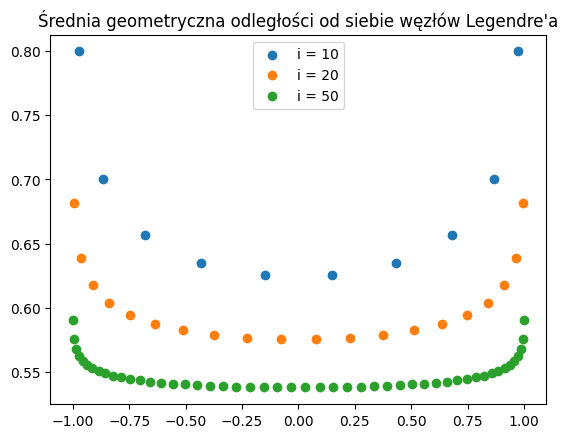

In [93]:
# Legendre's nodes

for i in (10, 20, 50):
    xs = legendre_nodes(i)
    plt.scatter(xs, calc_distances(xs), label=f"i = {i}")
plt.title("Średnia geometryczna odległości od siebie węzłów Legendre'a")
plt.legend()
plt.show()

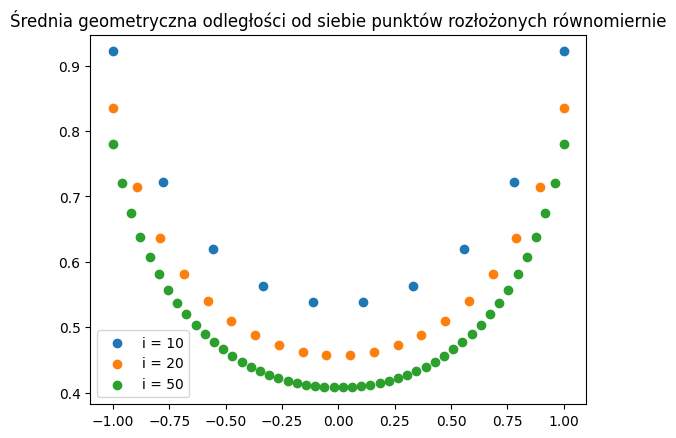

In [94]:
# Evenly distributed points
for i in (10, 20, 50):
    xs = np.linspace(-1, 1, i)
    plt.scatter(xs, calc_distances(xs), label=f"i = {i}")
plt.title("Średnia geometryczna odległości od siebie punktów rozłożonych równomiernie")
plt.legend()
plt.show()

### Zadanie 2

In [95]:
# x <- [-1, 1]
def f1(x):
    return 1.0 / (1 + 25 * x**2)
# x <- [0, 2pi]
def f2(x):
    return np.exp(np.cos(x))

In [96]:
def generate_ev_dist_nodes(n, fun):
    if fun == f1:
        start = -1
        stop = 1
    else:
        start = 0
        stop = 2*np.pi

    x = np.linspace(start, stop, n)
    return x, fun(x)

def generate_chebyshev_nodes(n, fun):
    if fun == f1:
        start = -1
        stop = 1
    else:
        start = 0
        stop = 2*np.pi
    
    x = chybeshev_nodes(n)
    x = (start + stop)/2 + (stop - start)/2 * x

    return x, fun(x)

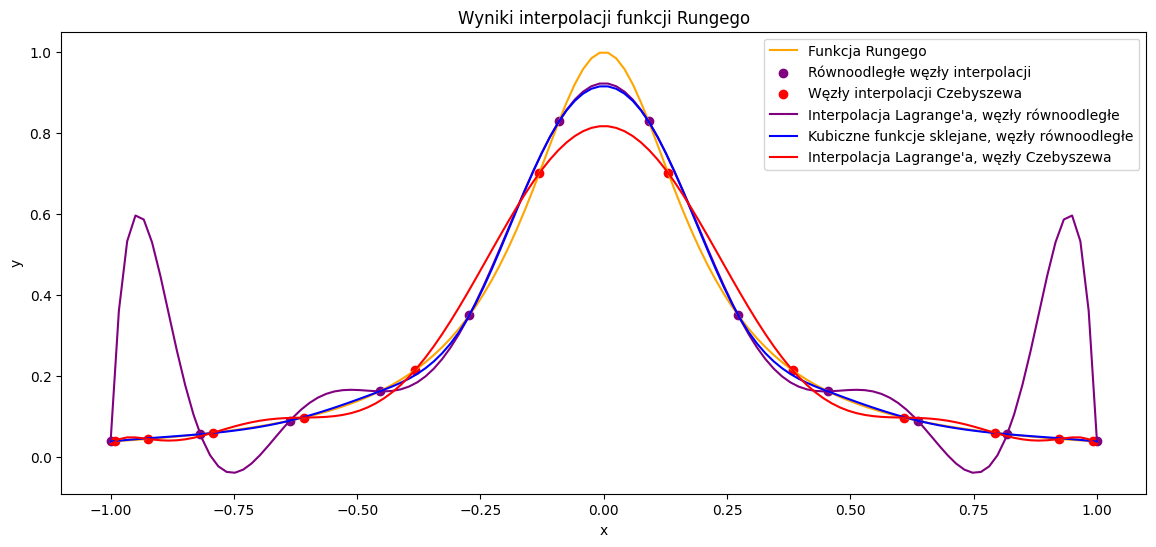

In [97]:
# Lagrange interpolation from previous lab

def lagrange_interpolation(x: np.ndarray, x_values, y_values):
    d = np.zeros(len(x_values))
    result = np.zeros(len(x))
    for i in range(len(x_values)):
        # Mianownik jest niezależny od x
        # d[i] = (xi-x0)(xi-x1)....(xi-x(i-1))(xi-x(i+1))...(xi-xn)
        d[i] = np.prod(x_values[i] - x_values[:i]) * np.prod(x_values[i] - x_values[i+1:])

    for i in range(len(y_values)):
        term = y_values[i]
        for j in range(len(y_values)):
            if i != j:
                term *= (x - x_values[j])
        result += term / d[i]
    
    return result

# number of interpolation nodes
n = 12
# evenly distributed interpolation points
xs = np.linspace(-1, 1, 10*n)

# evenly distributed interpolation nodes
x_eq, y_eq = generate_ev_dist_nodes(n, f1)
# Chebyshev's interpolation points
x_cheb, y_cheb = generate_chebyshev_nodes(n, f1)

# increase figure size (too much to show for default size)
plt.figure(figsize=(14, 6))
plt.title("Wyniki interpolacji funkcji Rungego")
plt.plot(xs, f1(xs), label="Funkcja Rungego", color="orange")
plt.scatter(x_eq, y_eq, label="Równoodległe węzły interpolacji", color="purple")
plt.scatter(x_cheb, y_cheb, label="Węzły interpolacji Czebyszewa", color="red")
plt.plot(xs, lagrange_interpolation(xs, x_eq, y_eq), label="Interpolacja Lagrange'a, węzły równoodległe", color="purple")
plt.plot(xs, scipy.interpolate.CubicSpline(x_eq, y_eq)(xs), label="Kubiczne funkcje sklejane, węzły równoodległe", color="blue")
plt.plot(xs, lagrange_interpolation(xs, x_cheb, y_cheb), label="Interpolacja Lagrange'a, węzły Czebyszewa", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [98]:
# 500 random points from (-1, 1)
xs_f1 = (np.random.random(500) + 1) / 2
xs_f1.sort()

# 500 random points from (0, 2pi)
xs_f2 = np.random.random(500) * 2 * np.pi
xs_f2.sort()

# for results
y_f1 = np.array([[None for _ in range(47)] for _ in range(3)])
y_f2 = np.array([[None for _ in range(47)] for _ in range(3)])

# actual values to calculate error
f1_reference = f1(xs_f1)
f2_reference = f2(xs_f2)

for i in range(4, 51):
    # evenly distributed interpolation nodes
    x_eq_f1, y_eq_f1 = generate_ev_dist_nodes(i, f1)
    x_eq_f2, y_eq_f2 = generate_ev_dist_nodes(i, f2)
    # Chebyshev's interpolation points
    x_cheb_f1, y_cheb_f1 = generate_chebyshev_nodes(i, f1)
    x_cheb_f2, y_cheb_f2 = generate_chebyshev_nodes(i, f2)

    y_f1[0][i-4] = lagrange_interpolation(xs_f1, x_eq_f1, y_eq_f1)
    y_f1[1][i-4] = scipy.interpolate.CubicSpline(x_eq_f1, y_eq_f1)(xs_f1)
    y_f1[2][i-4] = lagrange_interpolation(xs_f1, x_cheb_f1, y_cheb_f1)

    y_f2[0][i-4] = lagrange_interpolation(xs_f2, x_eq_f2, y_eq_f2)
    y_f2[1][i-4] = scipy.interpolate.CubicSpline(x_eq_f2, y_eq_f2)(xs_f2)
    y_f2[2][i-4] = lagrange_interpolation(xs_f2, x_cheb_f2, y_cheb_f2)


### Błąd

In [99]:
error_f1 = np.array([[None for _ in range(47)] for _ in range(3)])
error_f2 = np.array([[None for _ in range(47)] for _ in range(3)])

for i in range(47):
    for j in range(3):
        error_f1[j][i] = np.sqrt(np.sum((f1_reference - y_f1[j][i]) ** 2))
        error_f2[j][i] = np.sqrt(np.sum((f2_reference - y_f2[j][i]) ** 2))

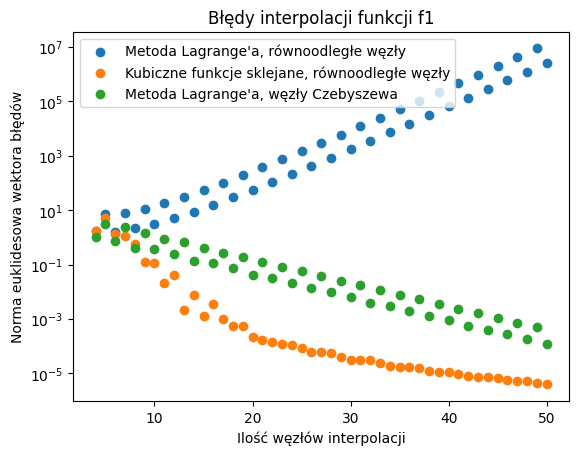

In [100]:
xs = [i for i in range(4, 51)]
plt.title("Błędy interpolacji funkcji f1")
plt.scatter(xs, error_f1[0], label="Metoda Lagrange'a, równoodległe węzły")
plt.scatter(xs, error_f1[1], label="Kubiczne funkcje sklejane, równoodległe węzły")
plt.scatter(xs, error_f1[2], label="Metoda Lagrange'a, węzły Czebyszewa")
plt.xlabel("Ilość węzłów interpolacji")
plt.ylabel("Norma euklidesowa wektora błędów")
plt.legend()
plt.yscale("log")

plt.show()

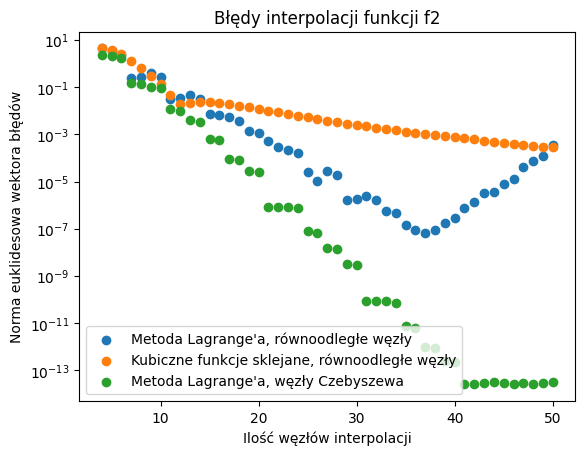

In [101]:
xs = [i for i in range(4, 51)]
plt.title("Błędy interpolacji funkcji f2")
plt.scatter(xs, error_f2[0], label="Metoda Lagrange'a, równoodległe węzły")
plt.scatter(xs, error_f2[1], label="Kubiczne funkcje sklejane, równoodległe węzły")
plt.scatter(xs, error_f2[2], label="Metoda Lagrange'a, węzły Czebyszewa")
plt.xlabel("Ilość węzłów interpolacji")
plt.ylabel("Norma euklidesowa wektora błędów")
plt.legend()
plt.yscale("log")

plt.show()